# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01, 9.82339382e+00, 1.74320833e+01, 1.72211248e-02]
truth_twil = [0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299, 6.14729027, 0.03415969]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 25

## Inspect Mintun1984Context twil

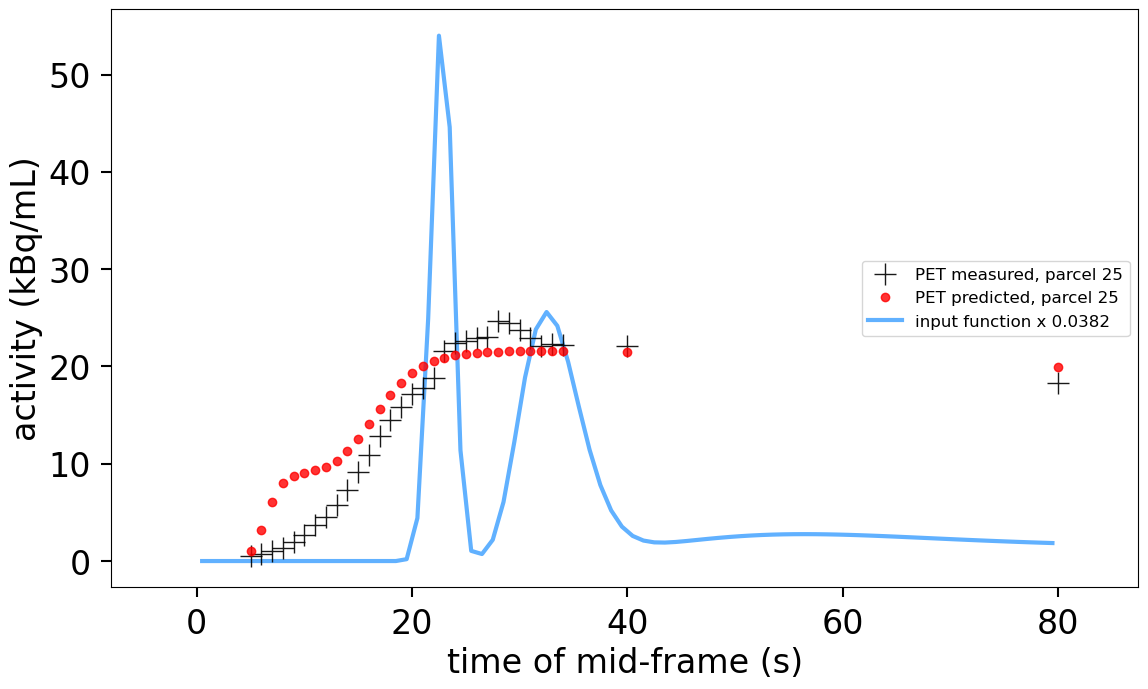

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(10))

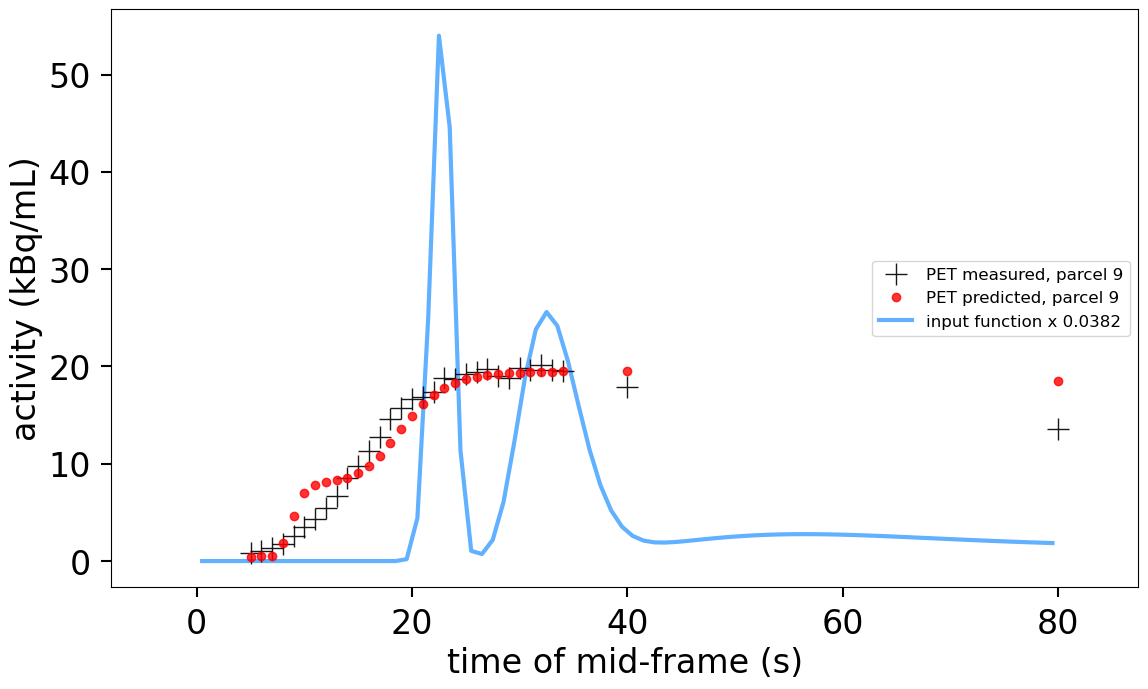

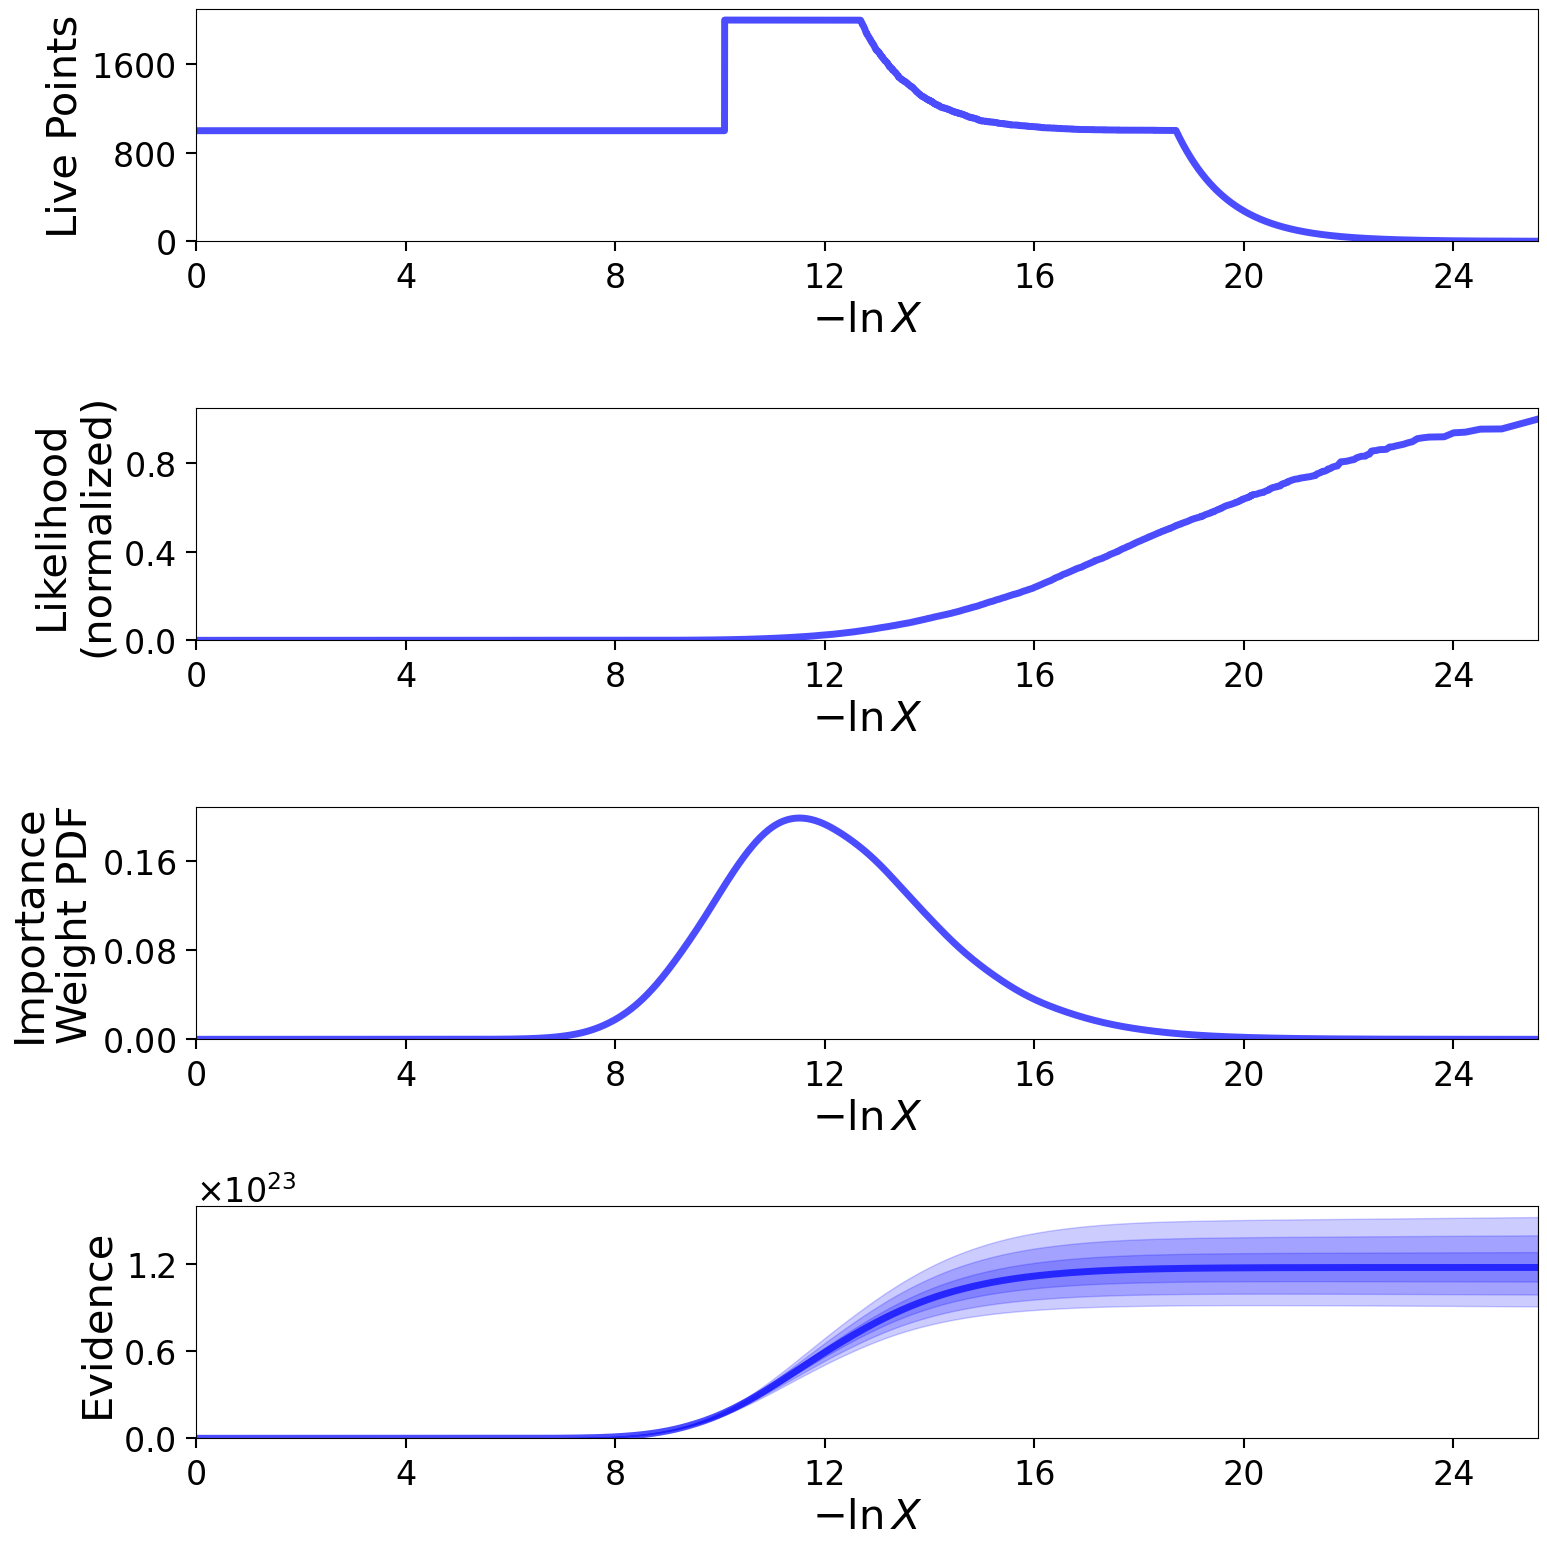

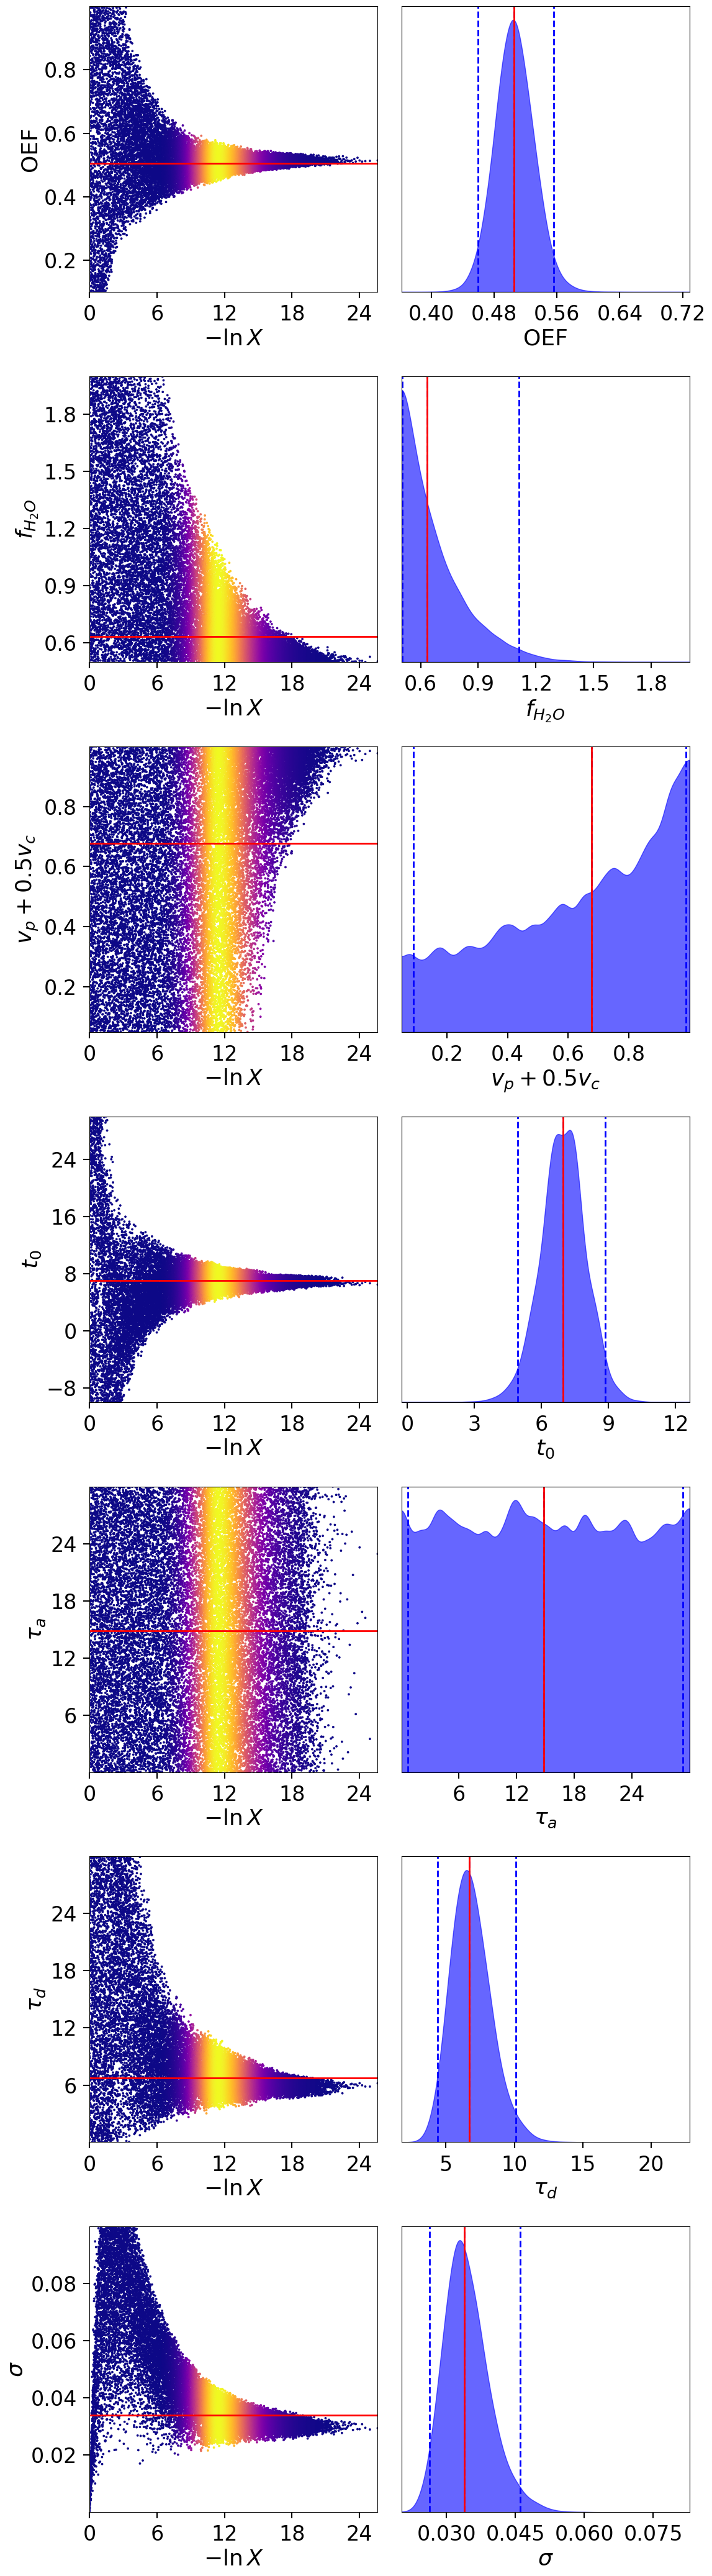

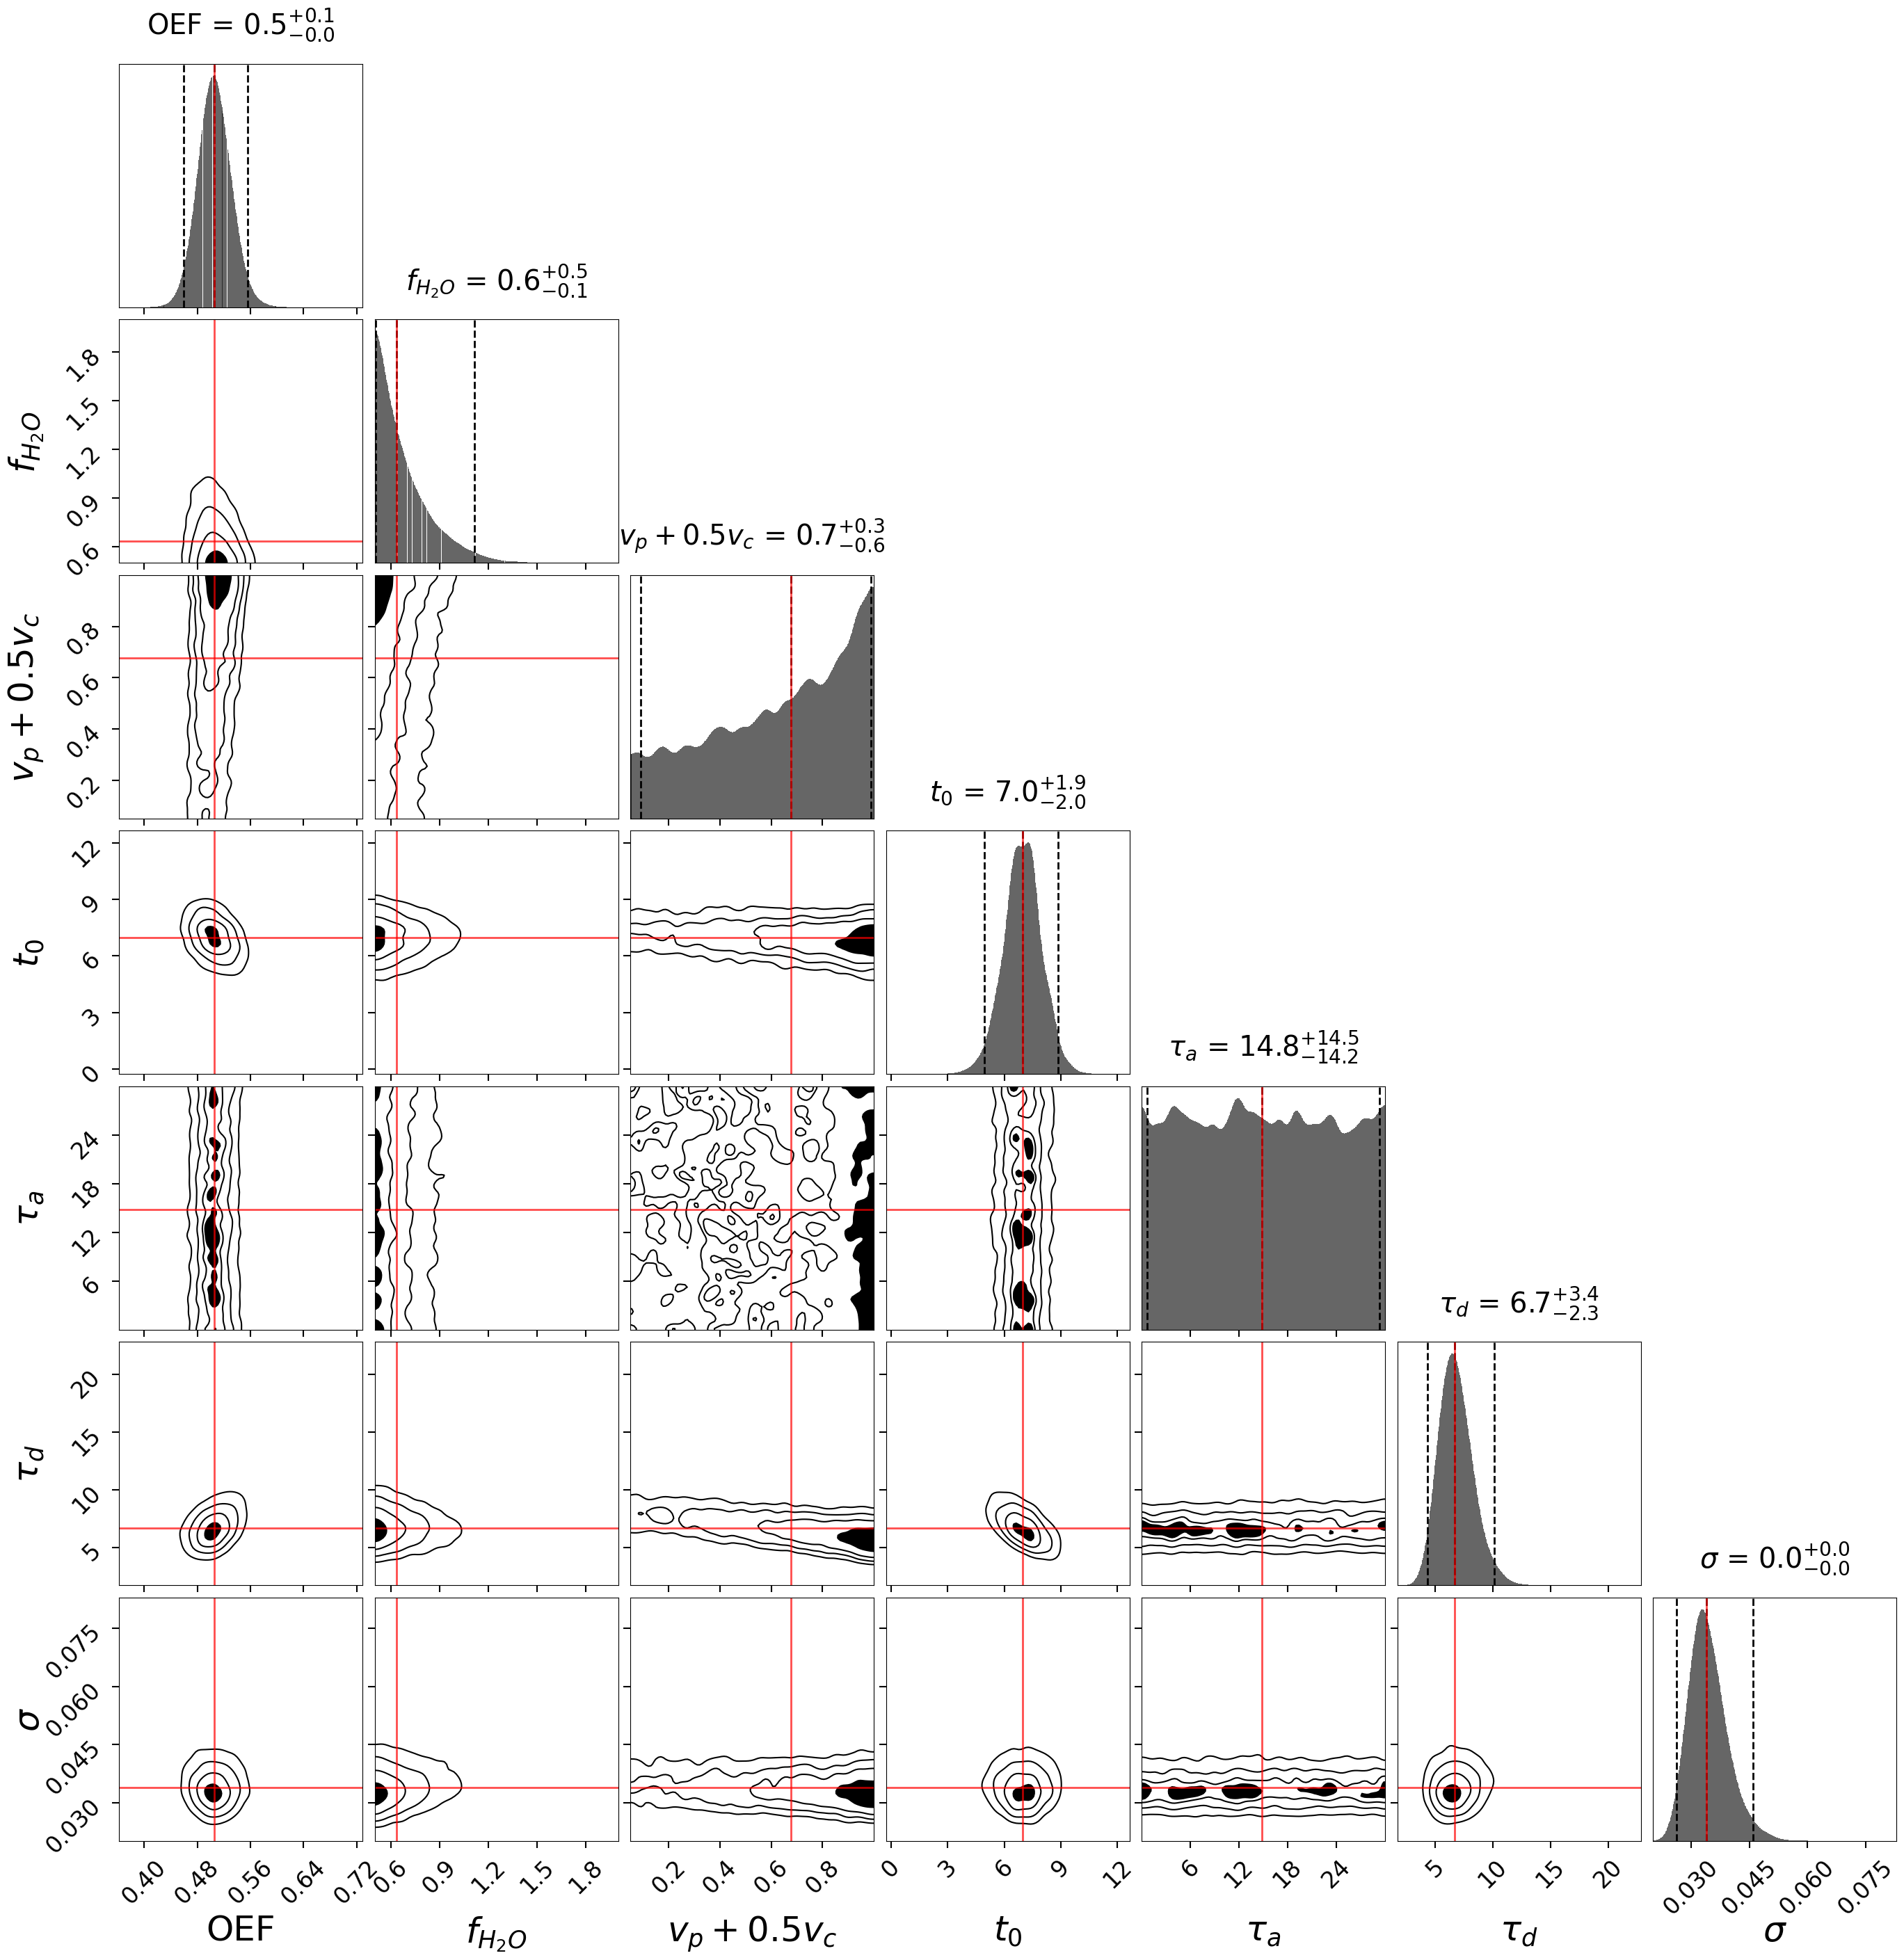

In [6]:
mm_twil.plotting.results_plot(tag="playground_mintun1984_twil", parc_index=9)

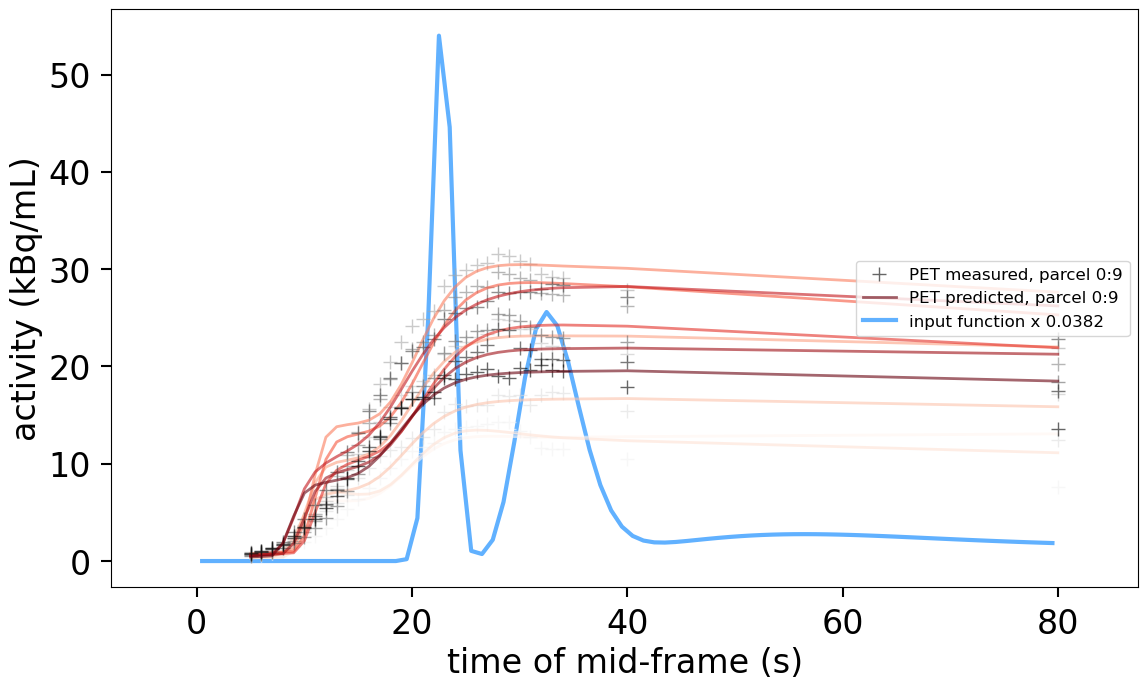

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Mintun1984Context idif

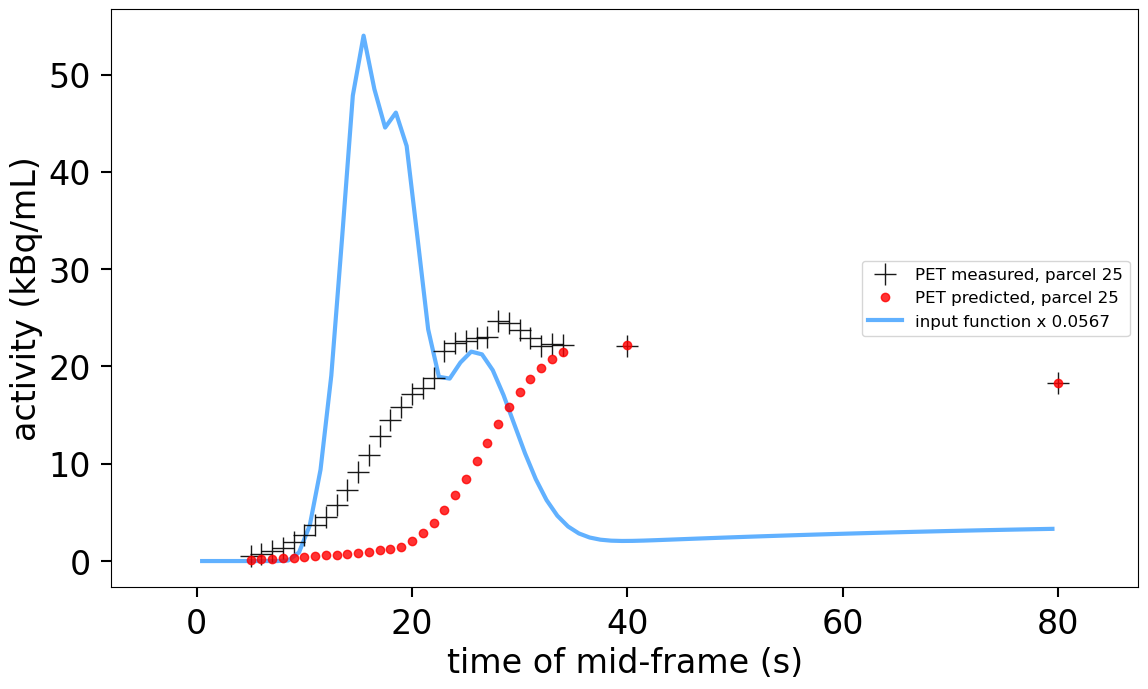

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(10))

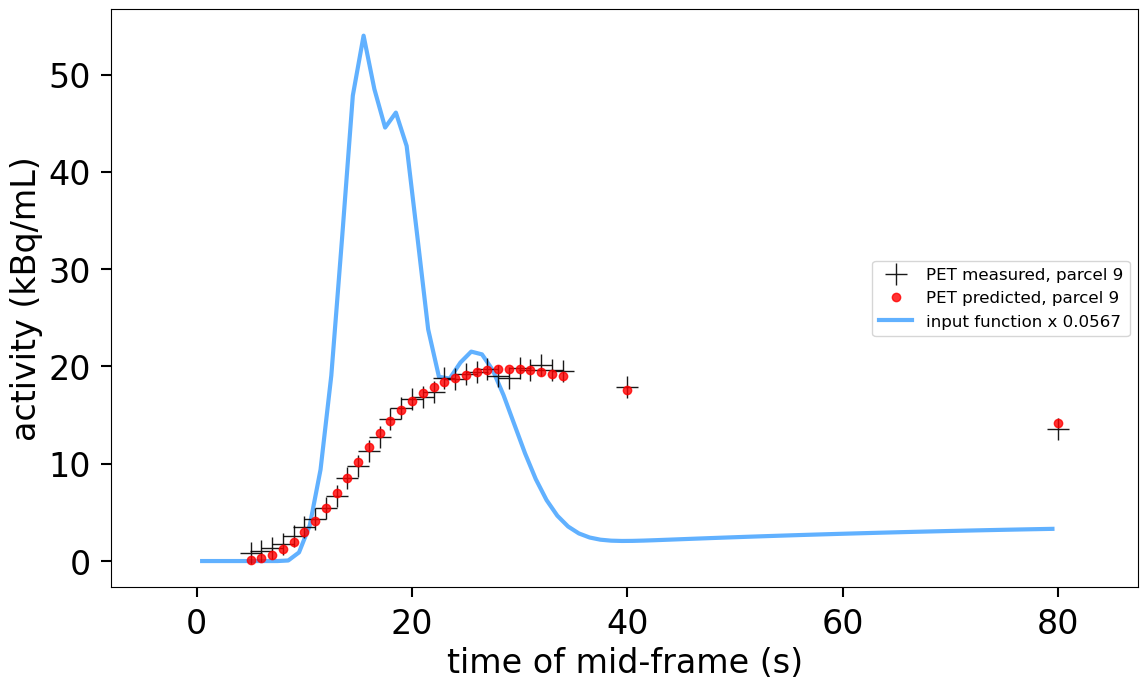

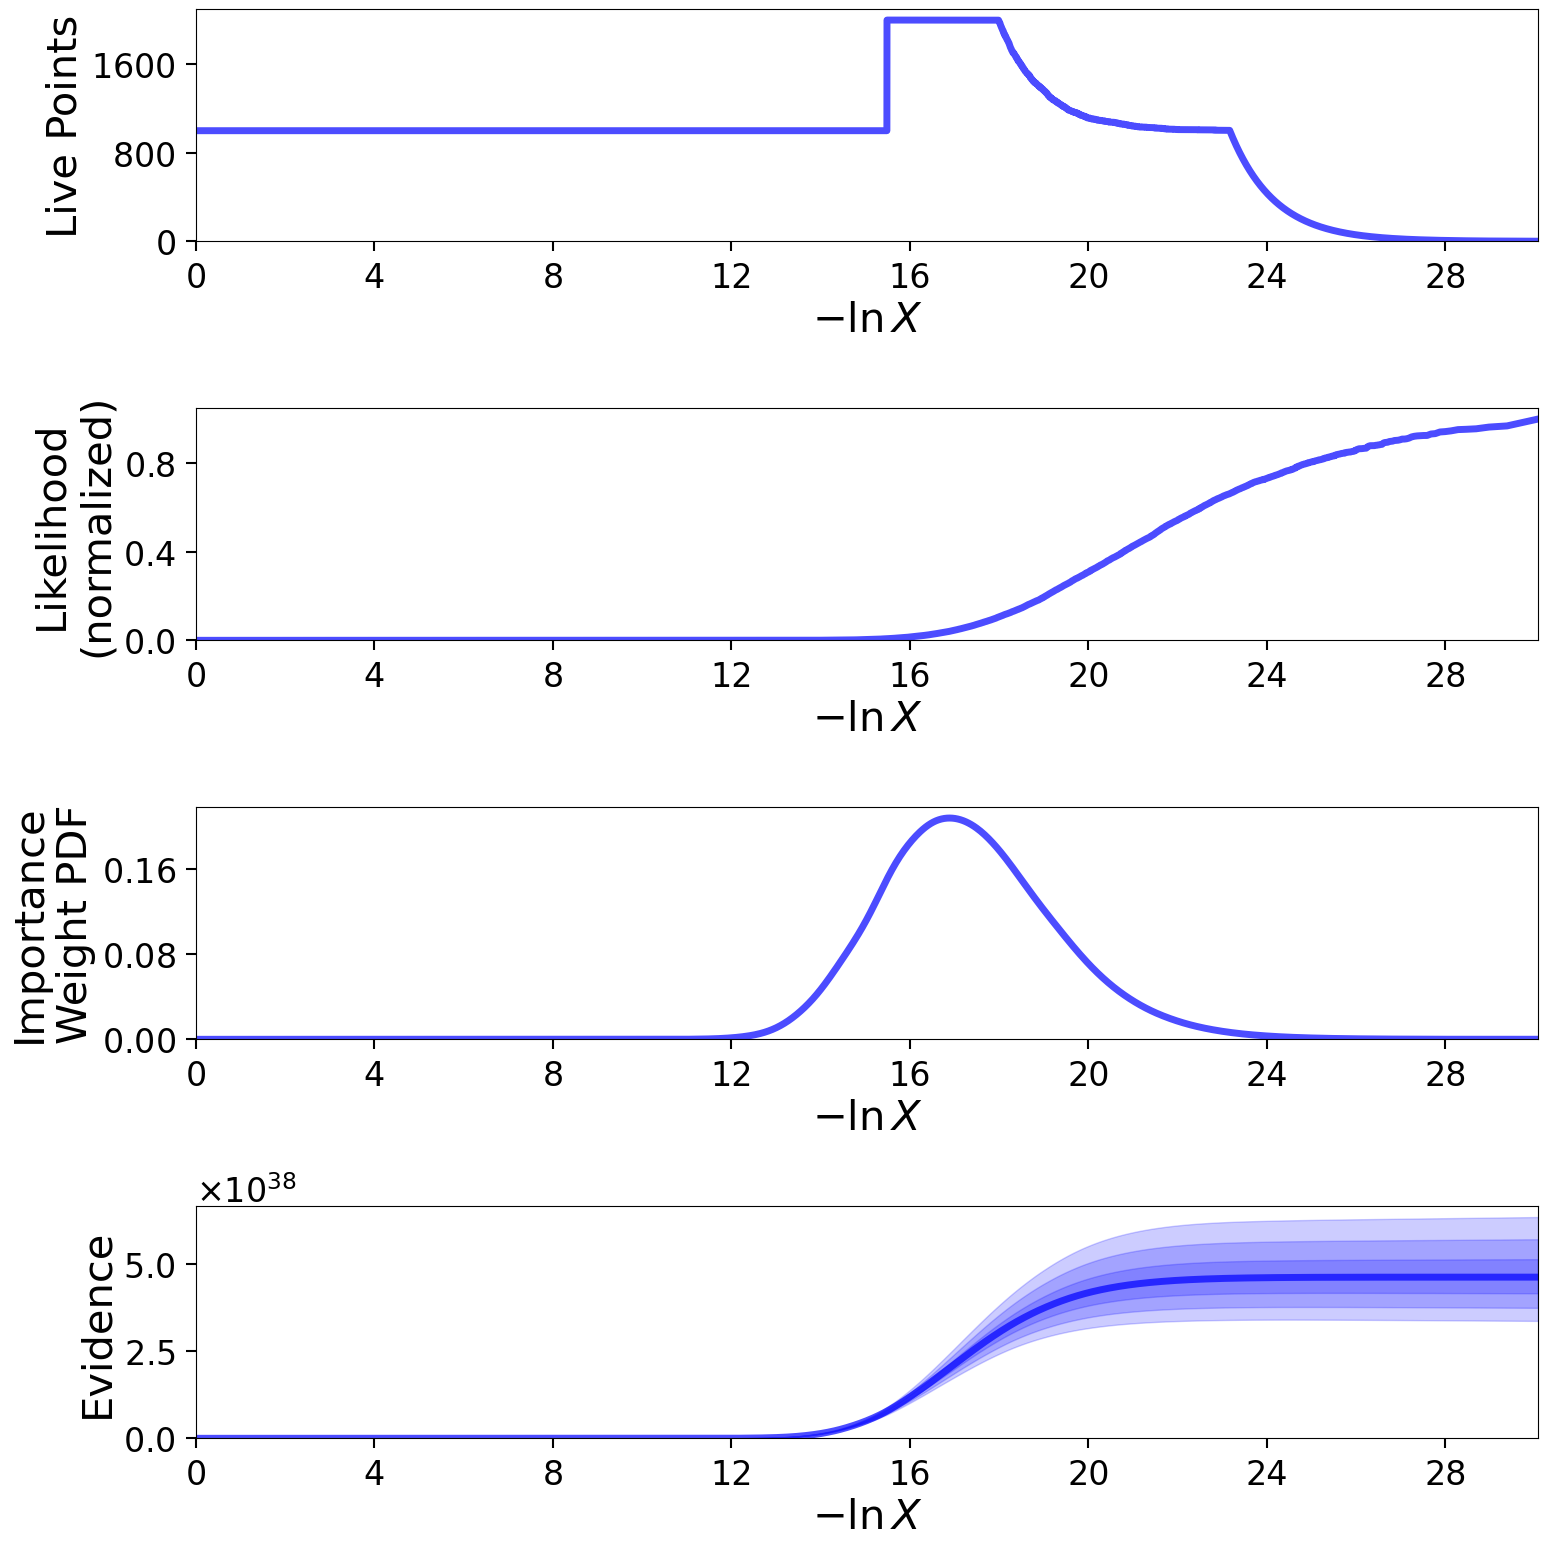

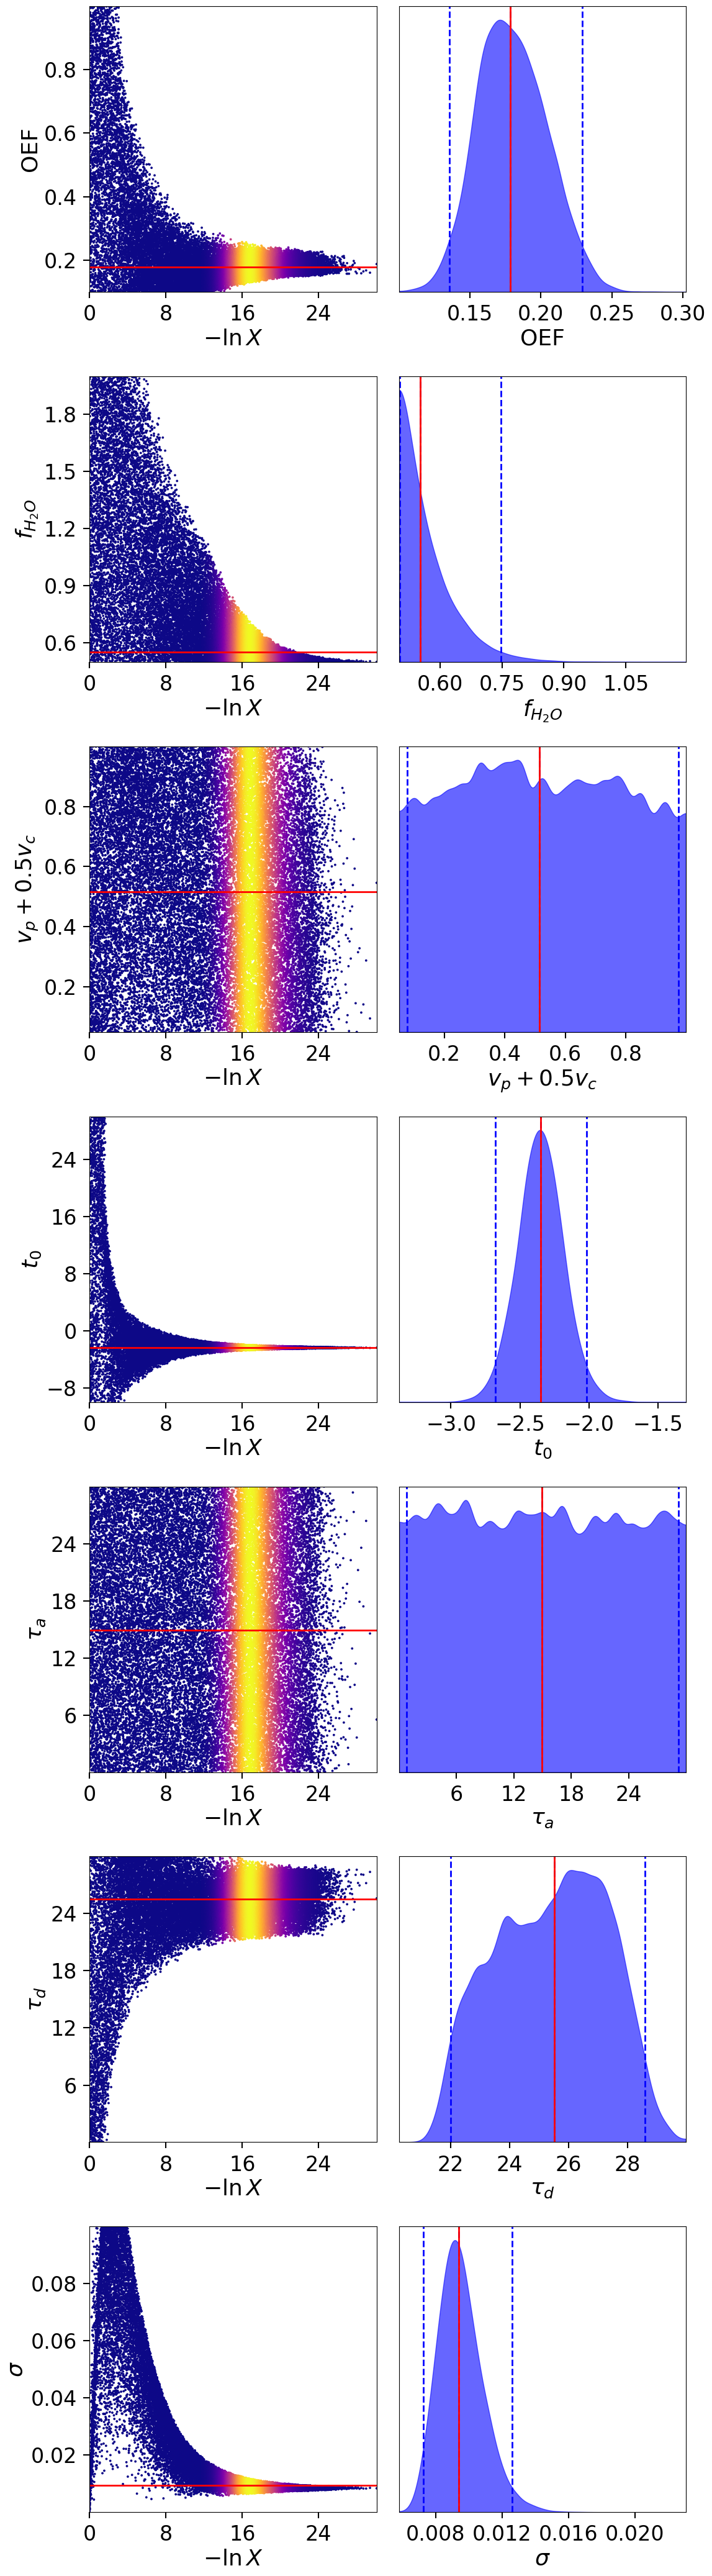

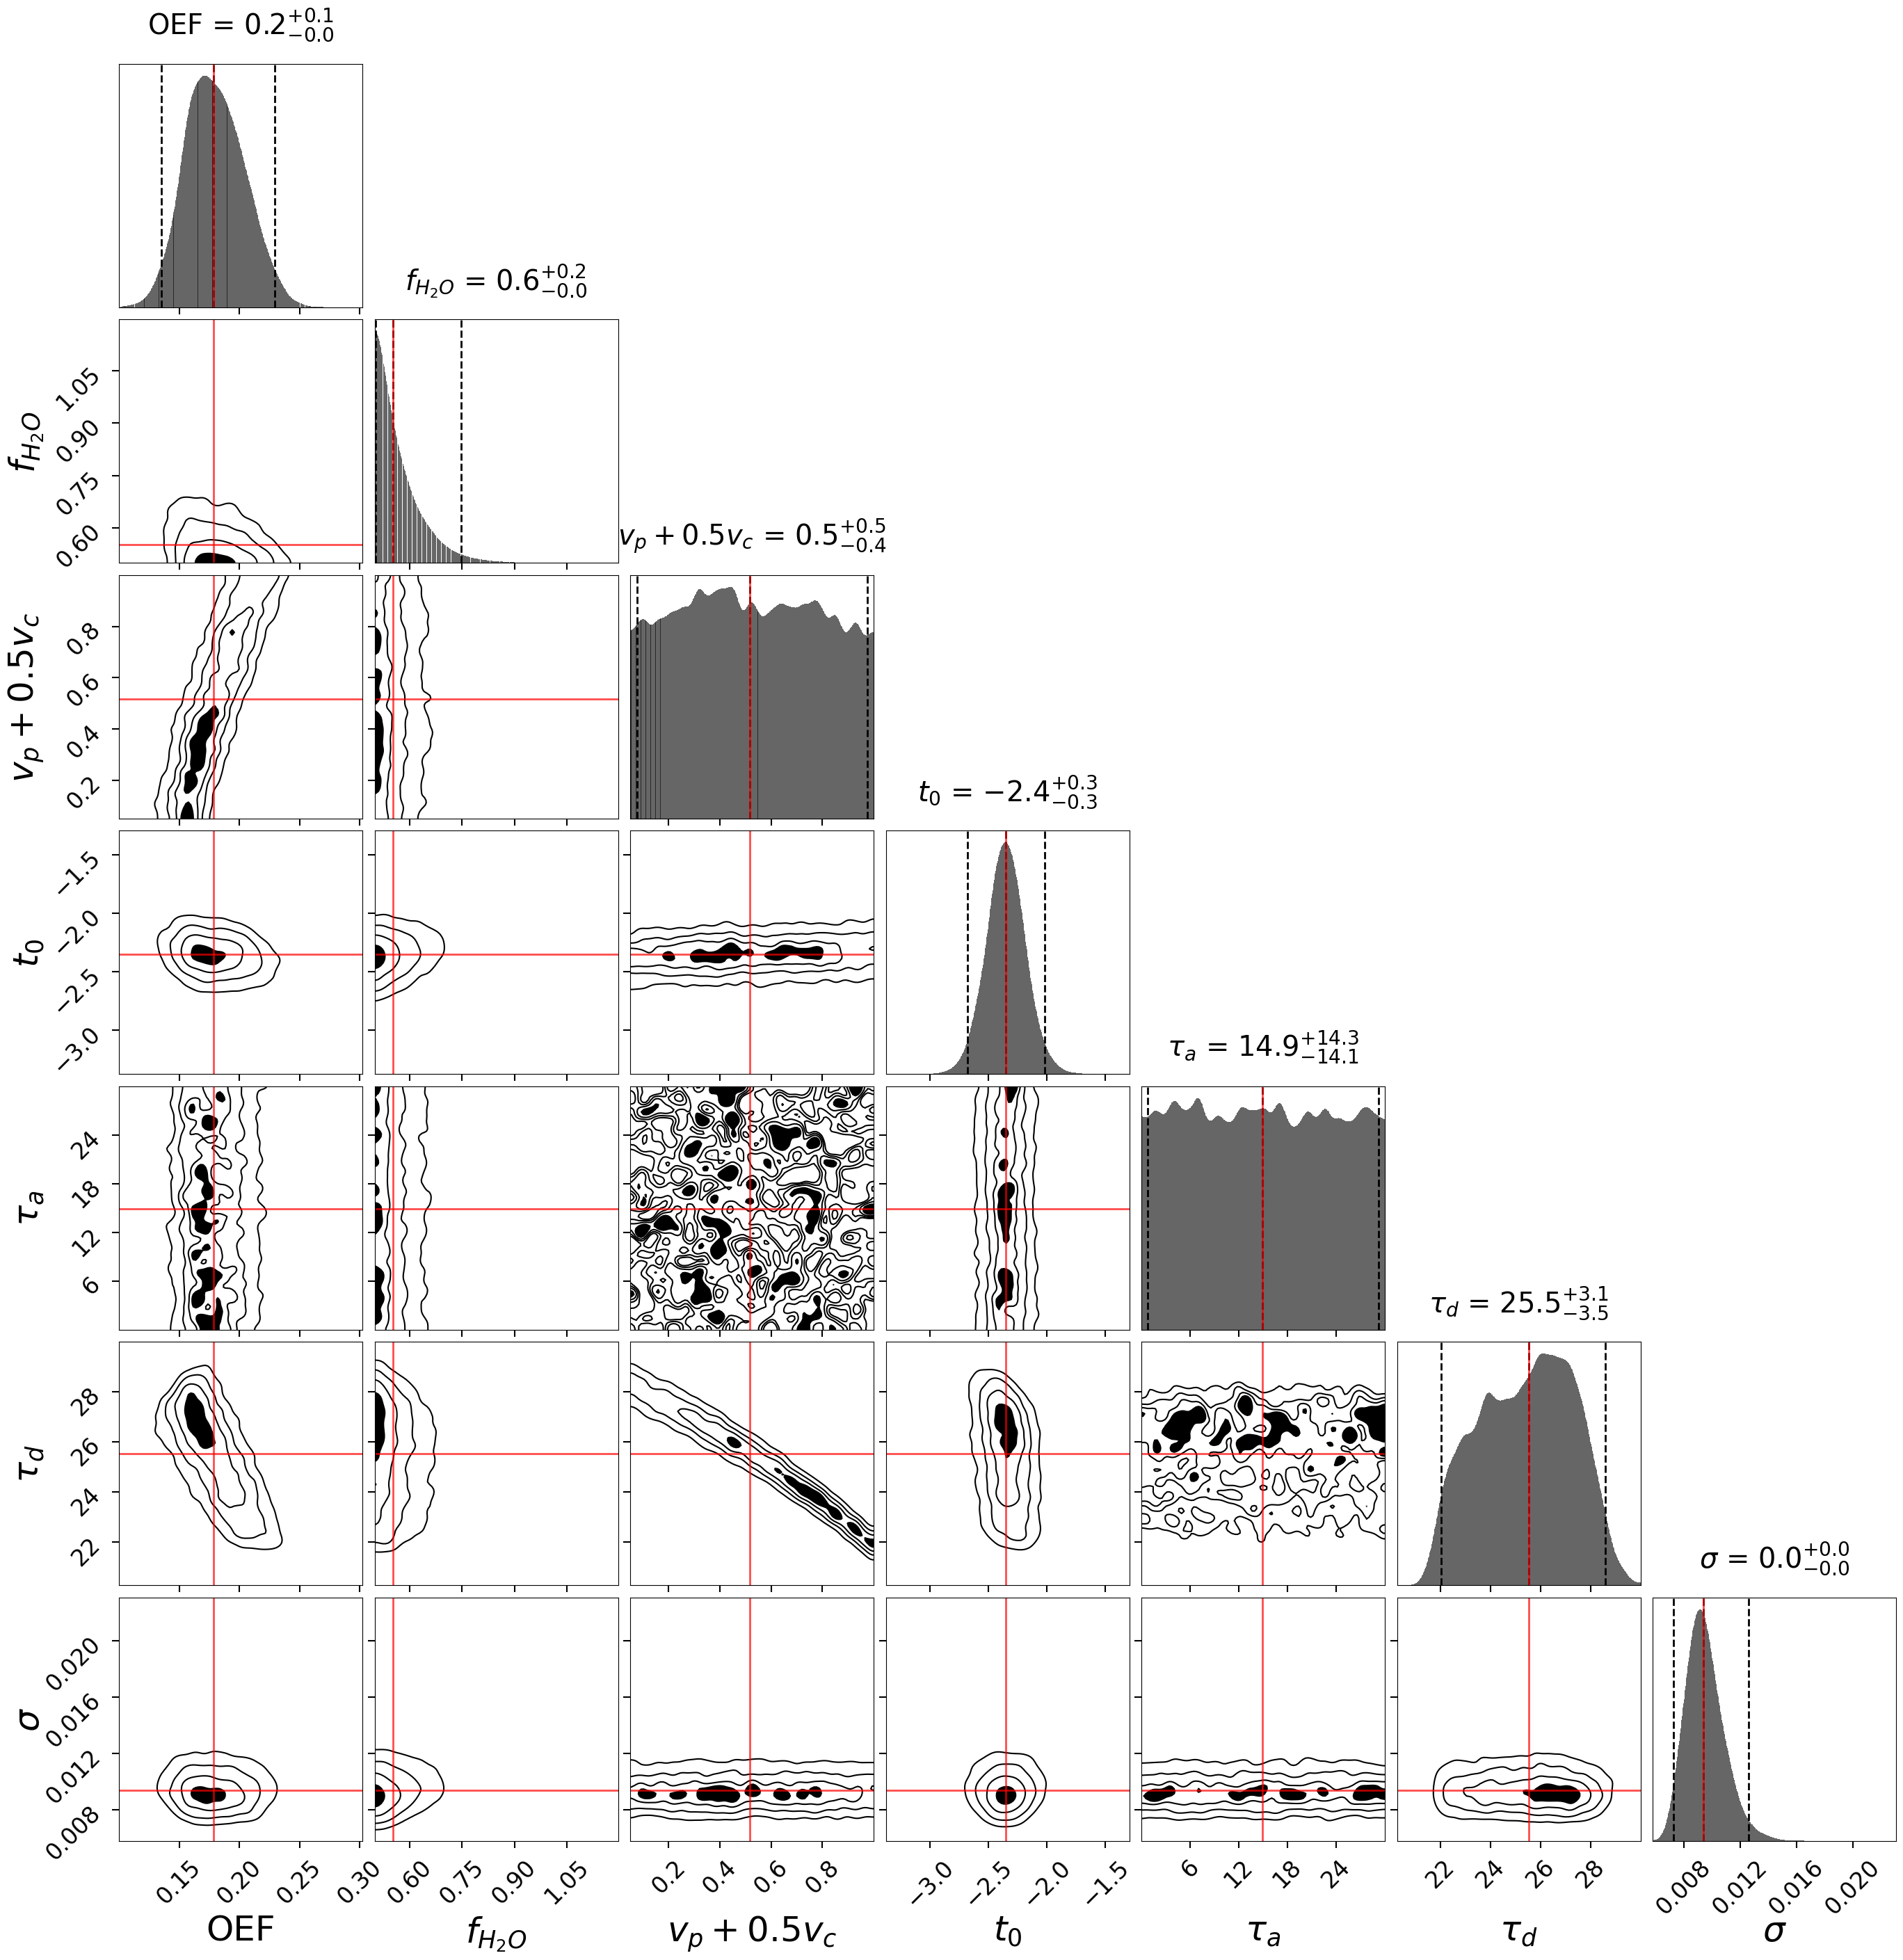

In [10]:
mm_idif.plotting.results_plot(tag="playground_mintun1984_idif", parc_index=9)

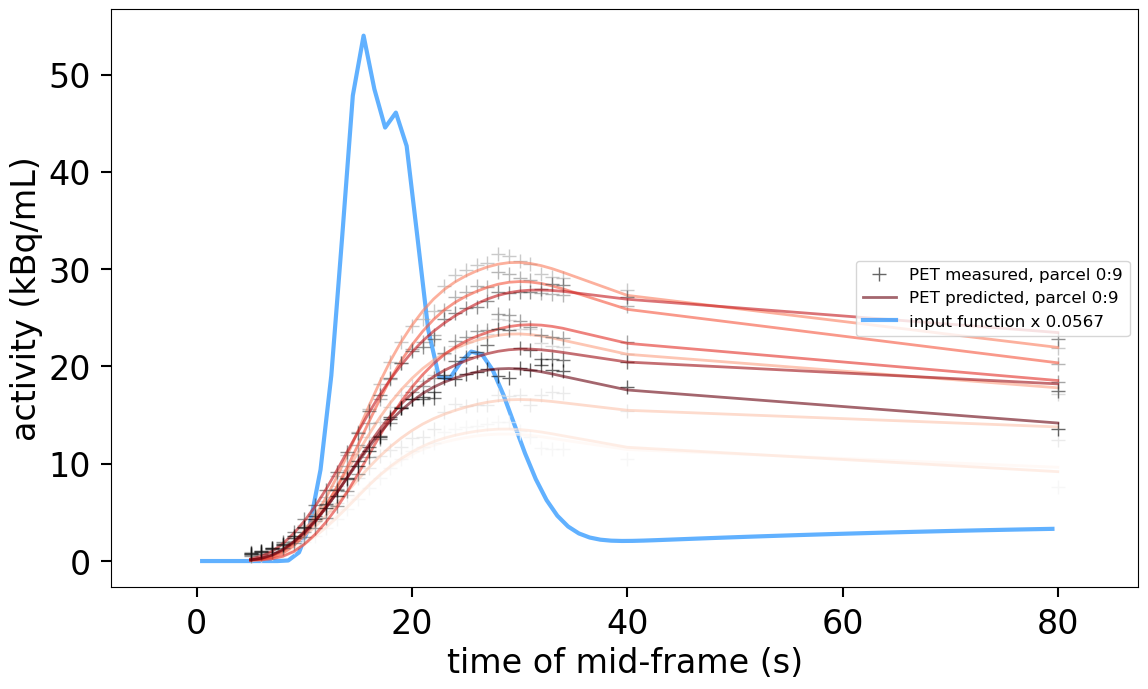

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
OEF                            0.56258
$f_{H_2O}$                     0.69314
$v_p + 0.5 v_c$                0.46128
$t_0$                          7.92198
$\tau_a$                      14.76161
$\tau_d$                       6.20995
$\sigma$                       0.02448

Row 1:
OEF                            0.71404
$f_{H_2O}$                     0.88538
$v_p + 0.5 v_c$                0.34815
$t_0$                          8.53958
$\tau_a$                      15.14678
$\tau_d$                       6.55959
$\sigma$                       0.02930

Row 2:
OEF                            0.46030
$f_{H_2O}$                     0.58918
$v_p + 0.5 v_c$                0.71230
$t_0$                          7.63841
$\tau_a$                      15.05101
$\tau_d$                       6.81112
$\sigma$                       0.02276

Row

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[ 0.56257848,  0.69314261,  0.46127774,  7.92198326, 14.76160702,
         6.20994851,  0.02447932],
       [ 0.71404309,  0.88538045,  0.34815054,  8.53957979, 15.1467783 ,
         6.55959445,  0.02929571],
       [ 0.46030016,  0.58918027,  0.71229539,  7.6384088 , 15.05100926,
         6.8111227 ,  0.02275575],
       [ 0.54507865,  0.64638416,  0.6653219 ,  8.29672604, 14.61780469,
         5.45670568,  0.03614024],
       [ 0.58594426,  0.71648964,  0.61553524,  8.86432658, 14.90673811,
         6.16950139,  0.05103408],
       [ 0.52720621,  0.66843433,  0.65863281,  9.21994995, 14.97330859,
         5.63422499,  0.04549818],
       [ 0.55490072,  0.6677585 ,  0.70533293,  9.13907801, 14.97841517,
         5.29118495,  0.0340956 ],
       [ 0.55832151,  0.64015416,  0.78600175,  7.23184657, 15.27104677,
         5.99648083,  0.03301306],
       [ 0.56859412,  0.65241962,  0.69881802,  8.22104786, 14.84196457,
         4.70824617,  0.03154292],
       [ 0.5053889 ,  0.6347